## Annotated videos of luderick from estuaries in southeast Queensland, Australia

Source: https://github.com/globalwetlands/luderick-seagrass


![alt text](https://github.com/globalwetlands/luderick-seagrass/raw/master/luderick-example.jpg "Title")


This dataset comprises of annotated footage of Girella tricuspidata in two estuary systems in south East Queensland, Australia. This data is suitable for a range of classification and object detection research in unconstrained underwater environments. The raw data was obtained using submerged action cameras (Haldex Sports Action Cam HD 1080p) to collect video footage in the Tweed River estuary in southeast Queensland (-28.169438, 153.547594), between February and July 2019. Additional footage was collected from seagrass meadows in a separate estuary system in Tallebudgera Creek (-28.109721, 153.448975). Each sampling day, six cameras were deployed for 1 h over a variety of seagrass patches; the angle and placement of cameras was varied among deployment to ensure a variety of backgrounds and fish angles. Videos were trimmed for training to contain only footage of luderick (the target species for the study) and split into 5 frames per second.

Full data report can be found here: https://doi.org/10.3389/fmars.2021.629485

--------------

This dataset includes 9429 annotations and 4280 images which can be used for training object detection deep learning models and other related computer vision tasks. The dataset is organised into 3 sub-datasets that have been allocated for training, test and novel test purposes.

-------------------------------------------------------------------------------------------------------------------------------

**Images and annotations download link:**

https://download.pangaea.de/dataset/926930/files/Fish_automated_identification_and_counting.zip

**Videos download links:**
 * Training: https://globalwetlands.blob.core.windows.net/globalwetlands-public/datasets/luderick-seagrass/videos/Wvo7U_76t.zip
 * Validation: https://globalwetlands.blob.core.windows.net/globalwetlands-public/datasets/luderick-seagrass/videos/OmKwIVpe-.zip
 * Test: https://globalwetlands.blob.core.windows.net/globalwetlands-public/datasets/luderick-seagrass/videos/4bUBoZmvV.zip
 
----------
**Dataset Splits:**
* **Training Dataset:** Luderick Seagrass Jack Evans A
* **Evaluation Dataset:** Luderick Seagrass Jack Evans B
* **Test Dataset:** Luderick Seagrass Tallebudgera


For each annotation in CSV format, the following columns are provided:

| Column       | Description                                                          |
| ------------ | -------------------------------------------------------------------- |
| id           | INT annotation ID                                                    |
| category     | STR name of category (luderick/bream)                                |
| category_id  | INT category ID                                                      |
| image        | STR image file name                                                  |
| image_id     | INT image ID                                                         |
| bbox_x       | INT minimum x pixel coordinate of bounding box                       |
| bbox_y       | INT minimum y pixel coordinate of bounding box                       |
| bbox_w       | INT width of bounding box in pixels                                  |
| bbox_h       | INT height of bounding box in pixels                                 |
| area         | INT area of bounding box in pixels squared                           |
| segmentation | STR segmentation polygon coordinates in format "[[x, y, x, y, ...]]" |

CSV Example

| id  | category | category_id | image                          | image_id | bbox_x | bbox_y | bbox_w | bbox_h | area   | segmentation     |
| --- | -------- | ----------- | ------------------------------ | -------- | ------ | ------ | ------ | ------ | ------ | ---------------- |
| 0   | luderick | 1           | 20190618_1.mov_5fps_000001.jpg | 0        | 0      | 76     | 624    | 1003   | 625872 | "[[5, 76, ...]]" |

## Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ast

In [2]:
DATASET_DIR = "Fish_automated_identification_and_counting"
IMAGES_DIR = os.path.join(DATASET_DIR, "luderick-seagrass")
CLASSES = ['background', 'luderick']

In [3]:
luderick_train_df = pd.read_csv(f'{DATASET_DIR}/luderick_seagrass_jack_evans_a.csv')
luderick_validation_df = pd.read_csv(f'{DATASET_DIR}/luderick_seagrass_jack_evans_b.csv')
luderick_test_df = pd.read_csv(f'{DATASET_DIR}/luderick_seagrass_tallebudgera.csv')

In [4]:
luderick_train_df

id  category  category_id                                image  \
0        0  luderick            1  04C1_Luderick_1.mov_5fps_000001.jpg   
1        1  luderick            1  04C1_Luderick_1.mov_5fps_000002.jpg   
2        2  luderick            1  04C1_Luderick_1.mov_5fps_000003.jpg   
3        3  luderick            1  04C1_Luderick_1.mov_5fps_000004.jpg   
4        4  luderick            1  04C1_Luderick_1.mov_5fps_000005.jpg   
...    ...       ...          ...                                  ...   
6697  6699  luderick            1             C4_Luderick_9_014000.jpg   
6698  6700  luderick            1             C4_Luderick_9_014200.jpg   
6699  6701  luderick            1             C4_Luderick_9_014400.jpg   
6700  6702  luderick            1             C4_Luderick_9_014600.jpg   
6701  6703  luderick            1             C4_Luderick_9_014800.jpg   

      image_id  bbox_x  bbox_y  bbox_w  bbox_h    area  \
0            0    1778     425     141     185   26085   
1            1    1659     406     260     239   62140   
2            2    1578     400     337     220   74140   
3            3    1508     398     304     228   69312   
4            4    1465     390     234     236   55224   
...        ...     ...     ...     ...     ...     ...   
6697      2669     471     127     228     233   53124   
6698      2670     561      79     268     234   62712   
6699      2671     573      33     398     228   90744   
6700      2672     650       3     476     213  101388   
6701      2673     797       6     489     178   87042   

                                           segmentation  
0     [[1778, 515, 1789, 498, 1806, 479, 1835, 457, ...  
1     [[1659, 509, 1675, 488, 1696, 465, 1720, 437, ...  
2     [[1578, 530, 1585, 512, 1594, 496, 1592, 477, ...  
3     [[1812, 624, 1795, 578, 1795, 542, 1797, 507, ...  
4     [[1691, 591, 1687, 544, 1688, 503, 1691, 473, ...  
...                                                 ...  
6697  [[471, 360, 491, 319, 492, 280, 487, 236, 489,...  
6698  [[578, 313, 592, 247, 618, 252, 656, 230, 679,...  
6699  [[578, 261, 594, 213, 601, 183, 594, 146, 581,...  
6700  [[650, 216, 676, 182, 673, 133, 674, 90, 673, ...  
6701  [[797, 184, 811, 150, 822, 123, 811, 70, 800, ...  

[6702 rows x 11 columns]

In [5]:
luderick_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6702 non-null   int64 
 1   category      6702 non-null   object
 2   category_id   6702 non-null   int64 
 3   image         6702 non-null   object
 4   image_id      6702 non-null   int64 
 5   bbox_x        6702 non-null   int64 
 6   bbox_y        6702 non-null   int64 
 7   bbox_w        6702 non-null   int64 
 8   bbox_h        6702 non-null   int64 
 9   area          6702 non-null   int64 
 10  segmentation  6702 non-null   object
dtypes: int64(8), object(3)
memory usage: 576.1+ KB


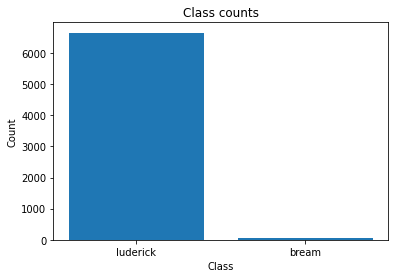

Number of luderick labels = 6649
Number of bream labels = 53


In [6]:
num_luderick = len(luderick_train_df[luderick_train_df['category'] == 'luderick'])
num_bream = len(luderick_train_df[luderick_train_df['category'] == 'bream'])
plt.bar(luderick_train_df['category'].unique(), [num_luderick, num_bream])
plt.title('Class counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show();
print(f"Number of luderick labels = {num_luderick}")
print(f"Number of bream labels = {num_bream}")

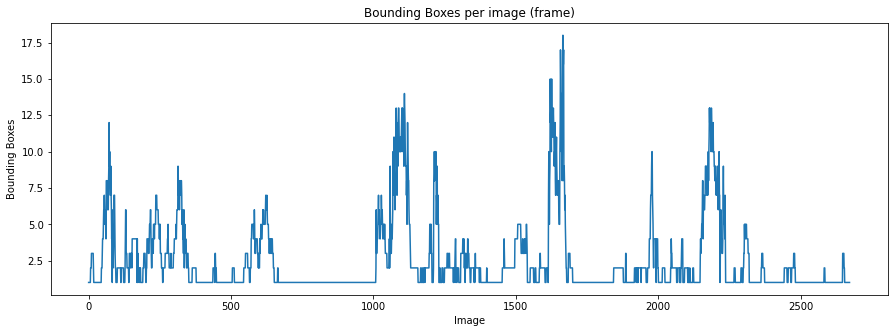

In [7]:
images_list = luderick_train_df['image'].unique()
number_boxes = luderick_train_df.groupby(['image'])["bbox_x"].count().to_list()
plt.figure(figsize=(15, 5))
plt.ylabel('Bounding Boxes')
plt.xlabel('Image')
plt.title('Bounding Boxes per image (frame)')
plt.plot(range(len(images_list)), number_boxes)
plt.show()

## Data Preprocessing

As the bream class has only 53 annotated boxes, I will ignore it and **only train the object detection on the luderick class.**


I want the data in the following format to use it on object detection models:

| Column       | Description                                                          |
| ------------ | -------------------------------------------------------------                                                |
| image_name    | STR image file name                                                  |
| video_name     | STR video name  
| frame_number | INT Frame number from its respective video |
| number_boxes | INT number of bounding boxes in the image |
| labels     | ARRAY(INT) class id of each bounding box (1 = luderick, 0 reserved for background)     |
| bounding_boxes      | ARRAY(ARRAY(INT)) list of bounding box coordinates in format [[x_min, y_min, x_max, y_max], ...]       
| area         | ARRAY(INT) area of each bounding box in pixels squared                           |
| segmentation | ARRAY(ARRAY(ARRAY(INT))) segmentation polygon coordinates in format [[[x, y, x, y, ...]], [[x, y,...]]] |

In [8]:
def get_video_name(image_name):
    """
    Extract the video name from the image name
    """
    if('Luderick' in image_name):
        luderick_index = image_name.index('Luderick')
        # get the video name by removing finding the index of the word Luderick and adding 11 characters for the _xx number
        video_name = image_name[:luderick_index+11]
        # if there's a single number, the last character will be either _ or . and has to be removed
        if video_name[-1] =='_' or video_name[-1] =='.':
            video_name = video_name[:-1]
    else:
        # If Luderick is not in the name, get the string before .mov or .jpg
        video_name = image_name.split('.mov')[0].split('.jpg')[0]
        
    return video_name

In [9]:
def preprocess_data(luderick_df):
    """
    Convert an original luderick DataFrame to the DataFrame format described above
    """
    # Remove the bream entries from the original dataframe
    luderick_df = luderick_df[luderick_df['category'] == 'luderick']
    # Create the dataframe
    output_df = pd.DataFrame(luderick_df['image'].unique(), columns=['image_name'])
    # get the list of unique images
    images_list = luderick_df['image'].unique()
    # get the list of box numbers
    number_boxes = luderick_df.groupby(['image'])["bbox_x"].count().to_list()
    # get the video names
    output_df['video_name'] = output_df['image_name'].apply(lambda x: get_video_name(x))
    # get the total frames in each video
    frame_numbers = output_df.groupby(['video_name'])["video_name"].count().to_list()
    # get the frame number for each frame in each video
    frame_numbers_array = np.array([np.arange(frames)+1 for frames in frame_numbers], dtype=object)
    # flatten the frame number array
    frame_numbers_array = np.hstack(frame_numbers_array)
    output_df['frame_number'] = frame_numbers_array
    # save the number of boxes
    output_df['number_boxes'] = number_boxes
    
    all_labels = []
    all_boxes = []
    all_areas = []
    all_segmentations = []
    for i, image in enumerate(images_list):
        # get all the rows of the image (frame), each row has info of one bounding box
        image_rows = luderick_df[luderick_df['image'] == image]
        # get all the class labels in the frame
        frame_labels = image_rows['category_id'].values
        # add frame labels to total label list
        all_labels.append(frame_labels)
        
        # get all the bounding boxes
        frame_boxes = image_rows[["bbox_x", "bbox_y", "bbox_w", "bbox_h"]].values
        # fix annotation errors where bbox coordinates are negative or higher than the image resolution
        frame_boxes[:, 0] = np.clip(frame_boxes[:, 0], 0, 1920).tolist()
        frame_boxes[:, 1] = np.clip(frame_boxes[:, 1], 0, 1080).tolist()
        # convert the bbox_w and bbox_h to x_max and y_max by adding those to bbox_x and bbox_y
        frame_boxes[:, 2] += frame_boxes[:, 0]
        frame_boxes[:, 3] += frame_boxes[:, 1]
        # fix annotation errors (there's at least one case of a coordinate at 1921 after adding the width)
        frame_boxes[:, 2] = np.clip(frame_boxes[:, 2], 0, 1920).tolist()
        frame_boxes[:, 3] = np.clip(frame_boxes[:, 3], 0, 1080).tolist()
        
        # add frame boxes to the total boxes list
        all_boxes.append(frame_boxes)
        # get all box areas of the frame
        frame_areas = image_rows['area'].values
        # add frame areas to the total areas list
        all_areas.append(frame_areas)
        # get the segmentations of that frame
        # ignore the rows that have no segmentation data (segmentatio = '[]')
        df_segmentations = image_rows[image_rows['segmentation'] !='[]']['segmentation'].values
        # clip negative values of segmentations to 0 and maximum to 1920
        frame_segmentations = [np.clip(ast.literal_eval(segm)[0], 0, 1920).tolist() for segm in df_segmentations]
        # add frame segmentations to the total segmentations list
        all_segmentations.append(frame_segmentations)

    output_df['labels'] = all_labels
    output_df['bounding_boxes'] = all_boxes
    output_df['area'] = all_areas
    output_df['segmentation'] = all_segmentations
    
    return output_df

In [10]:
train_df = preprocess_data(luderick_train_df)
train_df

image_name       video_name  frame_number  \
0     04C1_Luderick_1.mov_5fps_000001.jpg  04C1_Luderick_1             1   
1     04C1_Luderick_1.mov_5fps_000002.jpg  04C1_Luderick_1             2   
2     04C1_Luderick_1.mov_5fps_000003.jpg  04C1_Luderick_1             3   
3     04C1_Luderick_1.mov_5fps_000004.jpg  04C1_Luderick_1             4   
4     04C1_Luderick_1.mov_5fps_000005.jpg  04C1_Luderick_1             5   
...                                   ...              ...           ...   
2667             C4_Luderick_9_014000.jpg    C4_Luderick_9            21   
2668             C4_Luderick_9_014200.jpg    C4_Luderick_9            22   
2669             C4_Luderick_9_014400.jpg    C4_Luderick_9            23   
2670             C4_Luderick_9_014600.jpg    C4_Luderick_9            24   
2671             C4_Luderick_9_014800.jpg    C4_Luderick_9            25   

      number_boxes labels            bounding_boxes      area  \
0                1    [1]  [[1778, 425, 1919, 610]]   [26085]   
1                1    [1]  [[1659, 406, 1919, 645]]   [62140]   
2                1    [1]  [[1578, 400, 1915, 620]]   [74140]   
3                1    [1]  [[1508, 398, 1812, 626]]   [69312]   
4                1    [1]  [[1465, 390, 1699, 626]]   [55224]   
...            ...    ...                       ...       ...   
2667             1    [1]    [[471, 127, 699, 360]]   [53124]   
2668             1    [1]     [[561, 79, 829, 313]]   [62712]   
2669             1    [1]     [[573, 33, 971, 261]]   [90744]   
2670             1    [1]     [[650, 3, 1126, 216]]  [101388]   
2671             1    [1]     [[797, 6, 1286, 184]]   [87042]   

                                           segmentation  
0     [[1778, 515, 1789, 498, 1806, 479, 1835, 457, ...  
1     [[1659, 509, 1675, 488, 1696, 465, 1720, 437, ...  
2     [[1578, 530, 1585, 512, 1594, 496, 1592, 477, ...  
3     [[1812, 624, 1795, 578, 1795, 542, 1797, 507, ...  
4     [[1691, 591, 1687, 544, 1688, 503, 1691, 473, ...  
...                                                 ...  
2667  [[471, 360, 491, 319, 492, 280, 487, 236, 489,...  
2668  [[578, 313, 592, 247, 618, 252, 656, 230, 679,...  
2669  [[578, 261, 594, 213, 601, 183, 594, 146, 581,...  
2670  [[650, 216, 676, 182, 673, 133, 674, 90, 673, ...  
2671  [[797, 184, 811, 150, 822, 123, 811, 70, 800, ...  

[2672 rows x 8 columns]

In [11]:
validation_df = preprocess_data(luderick_validation_df)
validation_df

image_name        video_name  frame_number  \
0           04C2_Luderick_16_000400.jpg  04C2_Luderick_16             1   
1           04C2_Luderick_16_000600.jpg  04C2_Luderick_16             2   
2           04C2_Luderick_16_000800.jpg  04C2_Luderick_16             3   
3           04C2_Luderick_16_001000.jpg  04C2_Luderick_16             4   
4           04C2_Luderick_16_001200.jpg  04C2_Luderick_16             5   
..                                  ...               ...           ...   
819  C1_Luderick_14.mov_5fps_000013.jpg    C1_Luderick_14            13   
820  C1_Luderick_14.mov_5fps_000014.jpg    C1_Luderick_14            14   
821  C1_Luderick_14.mov_5fps_000015.jpg    C1_Luderick_14            15   
822  C1_Luderick_14.mov_5fps_000016.jpg    C1_Luderick_14            16   
823            brim.mov_5fps_000002.jpg              brim             1   

     number_boxes        labels  \
0               1           [1]   
1               1           [1]   
2               1           [1]   
3               1           [1]   
4               1           [1]   
..            ...           ...   
819             3     [1, 1, 1]   
820             3     [1, 1, 1]   
821             4  [1, 1, 1, 1]   
822             3     [1, 1, 1]   
823             1           [1]   

                                        bounding_boxes  \
0                                 [[2, 581, 163, 755]]   
1                                 [[2, 586, 223, 765]]   
2                                 [[0, 589, 281, 760]]   
3                                 [[2, 588, 339, 748]]   
4                                 [[2, 580, 380, 746]]   
..                                                 ...   
819  [[414, 235, 701, 432], [1584, 449, 1868, 590],...   
820  [[320, 254, 573, 449], [1457, 310, 1714, 451],...   
821  [[1455, 476, 1737, 611], [1397, 304, 1697, 444...   
822  [[214, 314, 372, 504], [1325, 303, 1703, 442],...   
823                             [[329, 565, 432, 663]]   

                             area  \
0                         [28014]   
1                         [39559]   
2                         [48051]   
3                         [53920]   
4                         [62748]   
..                            ...   
819         [56539, 40044, 24924]   
820         [49335, 36237, 42000]   
821  [38070, 42000, 12314, 40425]   
822         [30020, 52542, 38676]   
823                       [10094]   

                                          segmentation  
0    [[163, 703, 146, 678, 125, 649, 93, 620, 58, 6...  
1    [[223, 711, 218, 728, 195, 731, 131, 746, 107,...  
2    [[281, 703, 279, 722, 237, 732, 165, 751, 98, ...  
3    [[339, 700, 307, 711, 276, 726, 232, 737, 220,...  
4    [[380, 678, 354, 646, 308, 607, 253, 581, 200,...  
..                                                 ...  
819  [[701, 235, 699, 250, 699, 273, 692, 310, 690,...  
820  [[573, 254, 573, 271, 566, 314, 560, 335, 556,...  
821  [[1716, 476, 1716, 504, 1722, 526, 1737, 570, ...  
822  [[372, 314, 370, 327, 365, 344, 355, 372, 331,...  
823  [[432, 628, 432, 622, 426, 584, 422, 579, 414,...  

[824 rows x 8 columns]

In [23]:
test_df = preprocess_data(luderick_test_df)
test_df

image_name  video_name  frame_number  number_boxes  \
0    20190618_1.mov_5fps_000001.jpg  20190618_1             1             1   
1    20190618_1.mov_5fps_000002.jpg  20190618_1             2             1   
2    20190618_1.mov_5fps_000003.jpg  20190618_1             3             1   
3    20190618_1.mov_5fps_000004.jpg  20190618_1             4             1   
4    20190618_1.mov_5fps_000005.jpg  20190618_1             5             1   
..                              ...         ...           ...           ...   
756  20190710_9.mov_5fps_000007.jpg  20190710_9             3             2   
757  20190710_9.mov_5fps_000008.jpg  20190710_9             4             2   
758  20190710_9.mov_5fps_000009.jpg  20190710_9             5             2   
759  20190710_9.mov_5fps_000010.jpg  20190710_9             6             2   
760  20190710_9.mov_5fps_000011.jpg  20190710_9             7             2   

     labels                                   bounding_boxes             area  \
0       [1]                             [[0, 76, 624, 1079]]         [625872]   
1       [1]                             [[3, 68, 755, 1078]]         [759520]   
2       [1]                              [[0, 5, 869, 1079]]         [933306]   
3       [1]                              [[2, 6, 917, 1011]]         [919575]   
4       [1]                             [[2, 30, 909, 1054]]         [928768]   
..      ...                                              ...              ...   
756  [1, 1]    [[826, 801, 996, 960], [406, 691, 880, 1046]]  [27030, 168270]   
757  [1, 1]  [[847, 807, 1017, 1078], [204, 755, 835, 1076]]  [46070, 202551]   
758  [1, 1]   [[84, 790, 678, 1053], [880, 852, 1011, 1075]]  [156222, 29213]   
759  [1, 1]   [[935, 887, 1024, 1076], [23, 836, 518, 1036]]   [16821, 99000]   
760  [1, 1]    [[1, 844, 333, 1023], [935, 935, 1050, 1073]]   [59428, 15870]   

                                          segmentation  
0    [[5, 76, 154, 80, 409, 76, 471, 86, 546, 110, ...  
1    [[3, 1022, 75, 1005, 97, 1075, 272, 1078, 298,...  
2    [[0, 76, 578, 80, 592, 68, 586, 5, 860, 103, 8...  
3    [[592, 6, 592, 83, 2, 86, 5, 966, 30, 933, 102...  
4    [[2, 88, 602, 81, 595, 30, 779, 110, 829, 139,...  
..                                                 ...  
756  [[826, 880, 855, 912, 877, 959, 903, 960, 935,...  
757  [[916, 1072, 887, 1011, 847, 959, 879, 957, 93...  
758  [[84, 929, 109, 880, 143, 867, 166, 858, 223, ...  
759  [[982, 887, 935, 1076, 1024, 1076, 1023, 893],...  
760  [[10, 854, 81, 860, 131, 887, 177, 911, 263, 8...  

[761 rows x 8 columns]

## Data Exploration

Extracting information from the training data such as the number of frames per video, boxes per video, etc

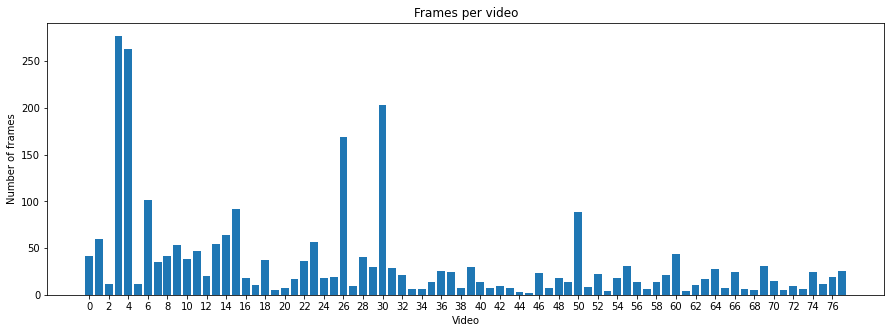

In [12]:
# Plot the number of frames per video
number_frames = train_df.groupby(['video_name'])['number_boxes'].count().to_list()
plt.figure(figsize=(15, 5))
plt.ylabel('Number of frames')
plt.xlabel('Video')
plt.title('Frames per video')
plt.xticks(np.arange(0, len(number_frames), step=2))
plt.bar(np.arange(len(number_frames)), number_frames)
plt.show();

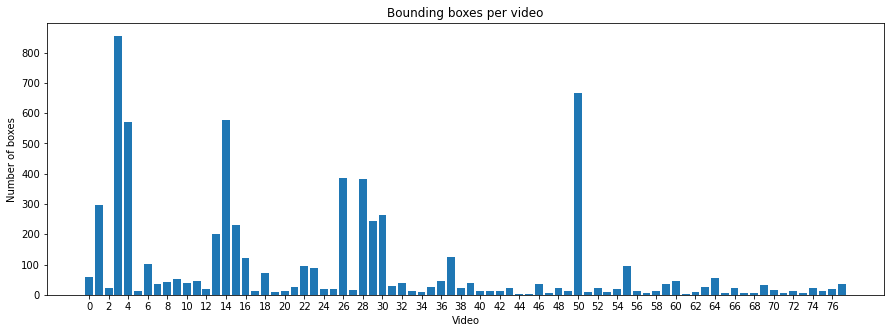

In [13]:
# Plot the number of bounding boxes per video
number_boxes = train_df.groupby(['video_name'])['number_boxes'].sum().to_list()
plt.figure(figsize=(15, 5))
plt.ylabel('Number of boxes')
plt.xlabel('Video')
plt.title('Bounding boxes per video')
plt.xticks(np.arange(0, len(number_boxes), step=2))
plt.bar(np.arange(len(number_boxes)), number_boxes)
plt.show();

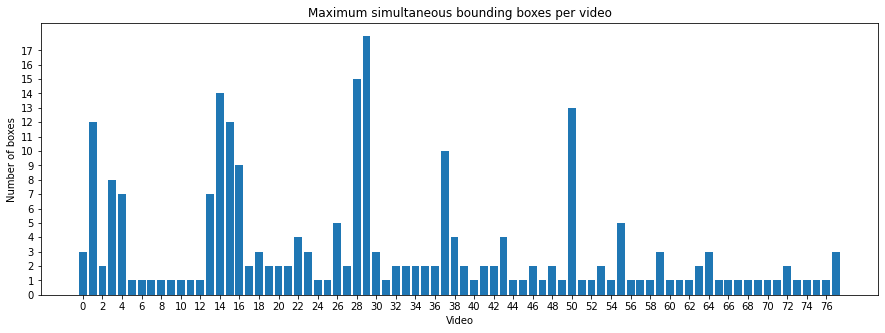

In [14]:
# Plot the number of maximum simultaneous bounding boxes per video
max_boxes = train_df.groupby(['video_name'])['number_boxes'].max().to_list()
plt.figure(figsize=(15, 5))
plt.ylabel('Number of boxes')
plt.xlabel('Video')
plt.title('Maximum simultaneous bounding boxes per video')
plt.xticks(np.arange(0, len(max_boxes), step=2))
plt.yticks(np.arange(0, train_df.groupby(['video_name'])['number_boxes'].max().max(), step=1))
plt.bar(np.arange(len(max_boxes)), max_boxes)
plt.show();

## Data visualization

In [15]:
import cv2
from PIL import Image
def draw_boxes(row):
    """
    Visualize an image with its bounding boxes from the selected row in the preprocessed DataFrame
    """
    image_path = os.path.join(IMAGES_DIR, row['image_name'])
    image = cv2.imread(image_path)
    # convert BGR to RGB color format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    boxes = row['bounding_boxes']
    for i, box in enumerate(boxes):
        label = CLASSES[row['labels'][i]]
        cv2.rectangle(image,
                     (int(box[0]), int(box[1])), (int(box[2]), int(box[3])),
                     (255, 0, 0), 2)
        cv2.putText(image, label, (int(box[0]), int(box[1]-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
        
    return image 

In [16]:
def view_image(image_array):
    """
    Display the image array
    """
    image = Image.fromarray((image_array).astype(np.uint8))  # Pil Image needs the image to be in int format
    display(image)

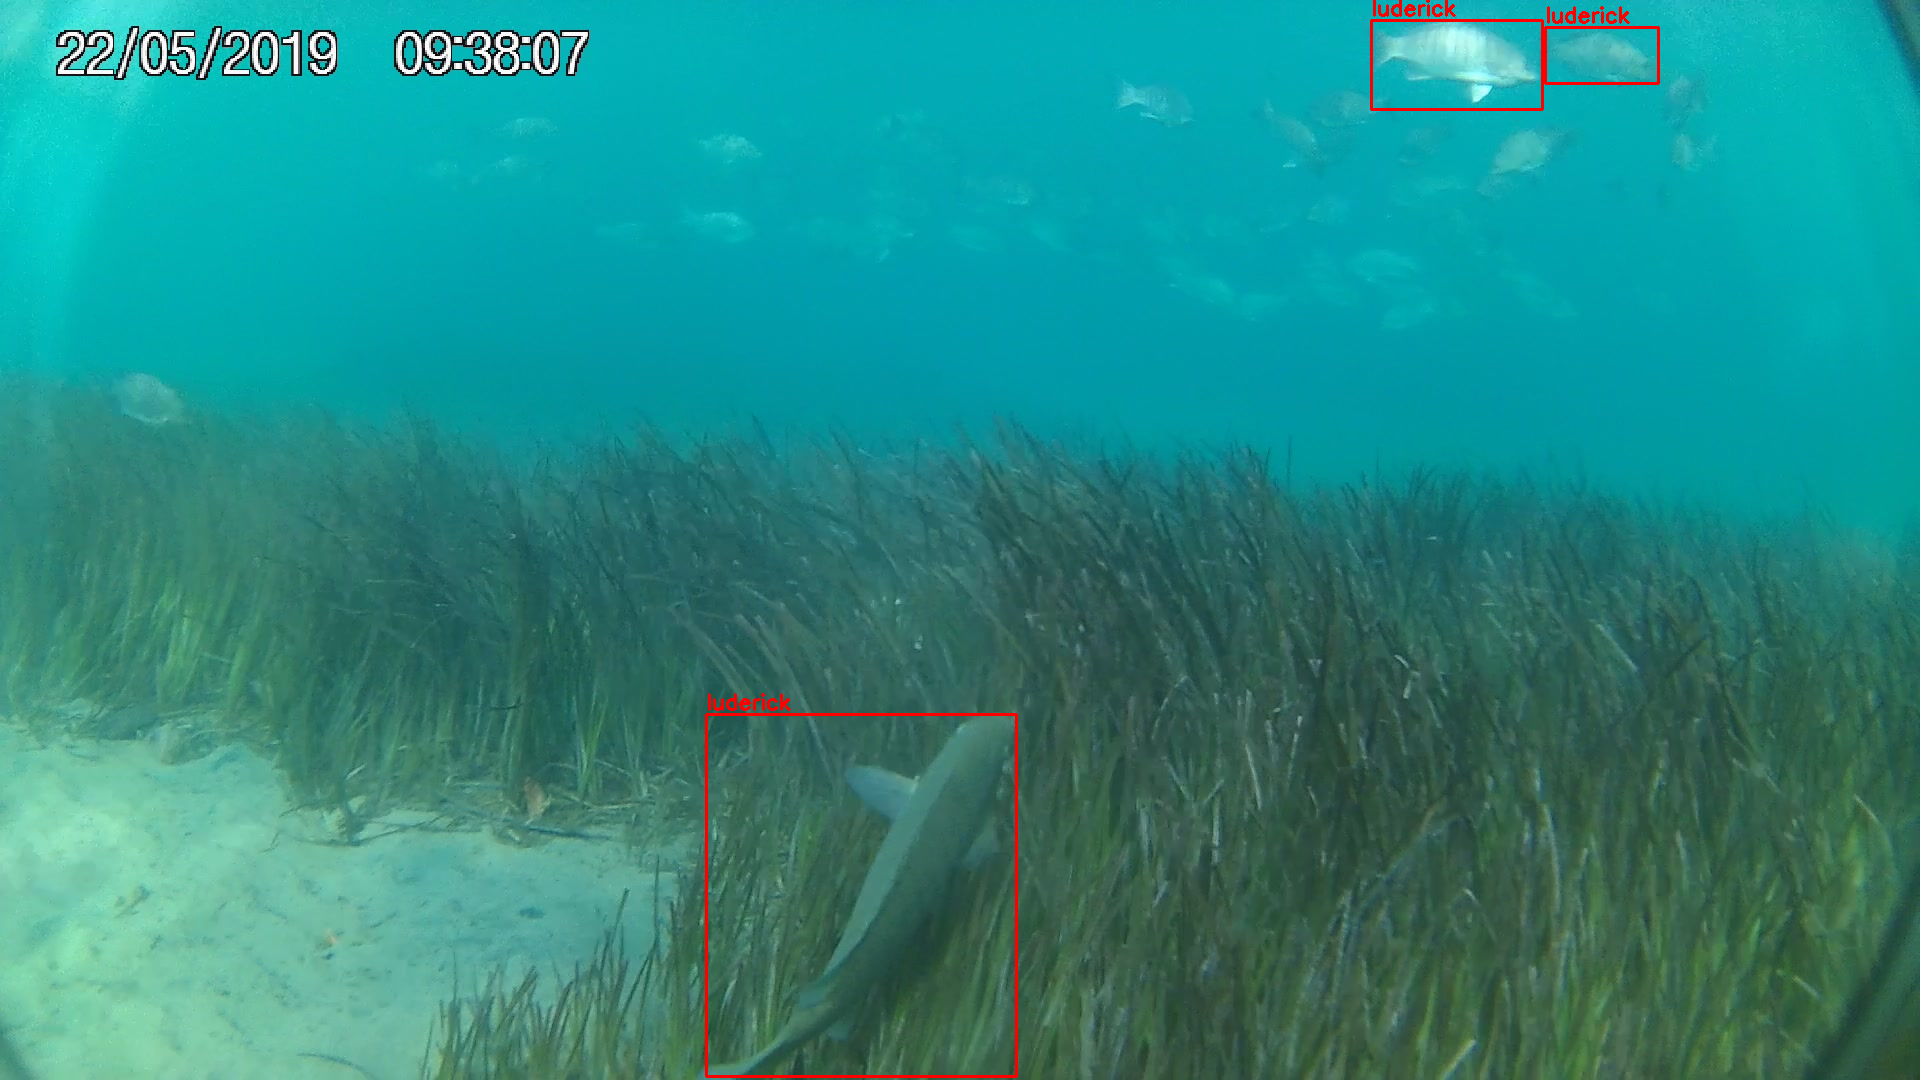

In [17]:
# show random image
random_row = np.random.randint(len(train_df))
image = draw_boxes(train_df.iloc[random_row])
view_image(image)

In [18]:
def view_image_segementation(row, fill_mask=False):
    """
    Visualize an image with its segmentation masks and boxes from the selected row in the preprocessed DataFrame
    """
    # get the image with bounding boxes using the previous function
    image = draw_boxes(row)
    for segmentation in row['segmentation']:
        x_coords = []
        y_coords = []
        for i, coord in enumerate(segmentation):
            if i%2 == 0:
                x_coords.append(coord) 
            else:
                y_coords.append(coord)
        segm_points = [list(coord) for coord in zip(x_coords, y_coords)]

        # draw the contours of the segmentation mask for more visibility
        # fill mask with color if fill_mask == True. Could decrease the framerate in real time video
        cv2.drawContours(image, 
                         np.array([segm_points], dtype='int32'),
                         -1,
                         (255, 255, 0),
                         thickness=cv2.FILLED if fill_mask else 3)

    return image   

--- 0.0449981689453125 seconds ---


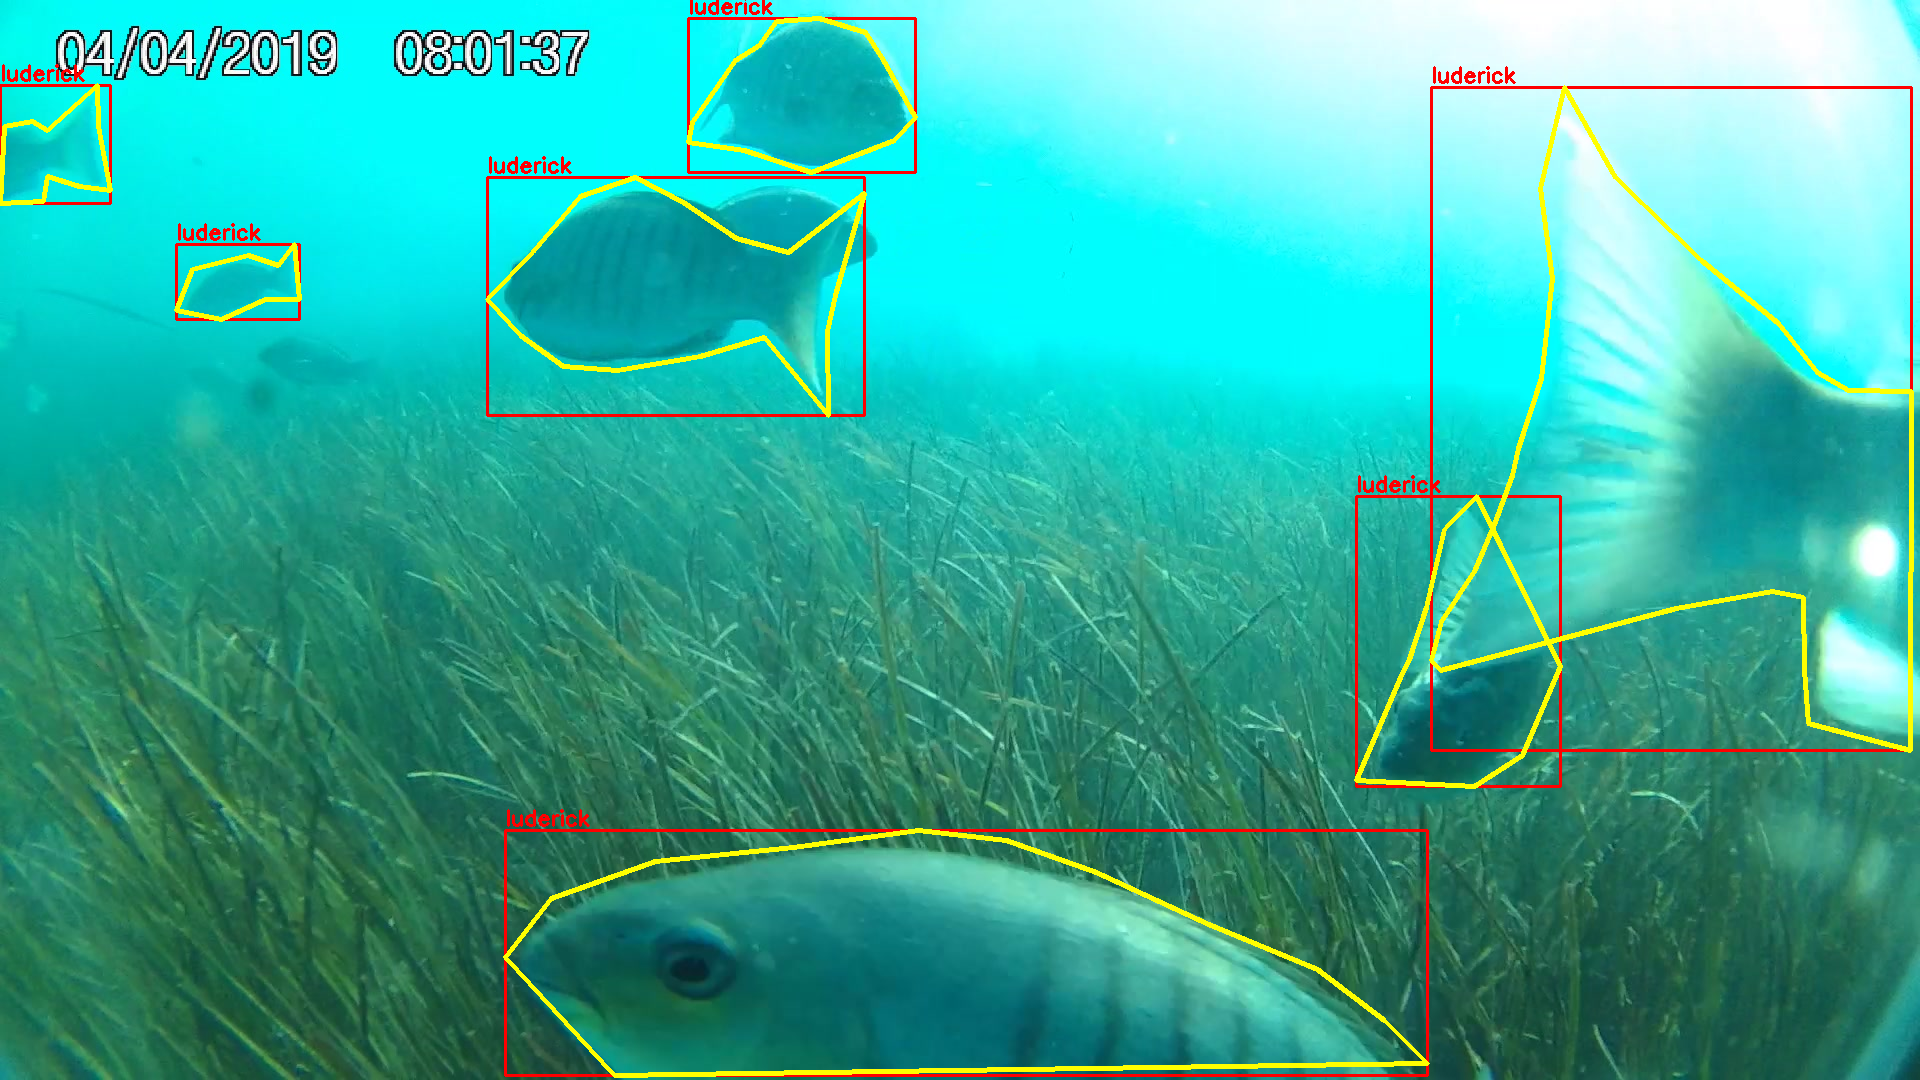

In [19]:
import time
start_time = time.time()
segm_image = view_image_segementation(train_df.iloc[90], False)
print("--- %s seconds ---" % (time.time() - start_time))
view_image(segm_image)

## Save the preprocessed DataFrame
Save the prepropressed dataframe as .csv to use it in object detection models on other notebooks

In [20]:
def save_preprocessed_df(prepocessed_df, output_dir):
    """
    Save the preprocessed dataframe at the desired path as .csv
    """
    # convert the array columns into strings to save them correctly as .csv
    # .tolist() is to convert numpy arrays to python arrays, that get converted into strings correctly
    output_df = prepocessed_df.copy()
    output_df['labels'] = output_df['labels'].apply(lambda x: f"{x.tolist()}")
    output_df['bounding_boxes'] = output_df['bounding_boxes'].apply(lambda x: f"{x.tolist()}")
    output_df['area'] = output_df['area'].apply(lambda x: f"{x.tolist()}")
    output_df['segmentation'] = output_df['segmentation'].apply(lambda x: f"{x}")
    output_df.to_csv(output_dir, index=False)

In [24]:
save_preprocessed_df(train_df, 'luderick_train_preprocessed.csv')
save_preprocessed_df(validation_df, 'luderick_validation_preprocessed.csv')
save_preprocessed_df(test_df, 'luderick_test_preprocessed.csv')

In [22]:
# Save only the test images list, no need to preprocess all the data from the test dataset
test_images = images_list = luderick_test_df['image'].unique()
test_df = pd.DataFrame(test_images, columns=['image_name'])
test_df.to_csv("luderick_test.csv", index=False)